# Ratings and musical sophistication analyses (all experiments) 
This notebook steps through all statistical analyses and figures presented in Fink, Alexander, and Janata (2022), related to ratings and musicianship data. For tapping-related analyses, please see the other notebook in this repo `GEM_tapping_analyses.ipynb`. For exploratory individual differences analyses, please see the R notebook `GEM_exploratory_individual_analyses.Rmd`. The analyses in this notebook rely on two data tables that have also been released with this repository (in the data folder). As long as file paths to those .csv files are set accordingly, all analyses should run in Jupyter on anyone's machine.


#### Prepared by Lauren Fink
For questions: email lkfink@ucdavis.edu or lauren.fink@ae.mpg.de

In [52]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Load required packages
import os
import sys
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import *
import re
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pingouin as pg
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 

# Load data tables (provided with repo)

Please be sure to set the file paths to these tables appropriately.

Note that tapping data are in raw milliseconds. 
For the 1 player data, ratings data are in the table raw and as zscores within participant and item.
For the group data, all ratings have already been z-scored within participant and scale before averaging across group members. 

Experiment IDs are as in the paper:

| Experiment ID | Experiment description|
|:------        |:------|
|1 |            1 player, hear metronome|
|2 |            1 player, hear metronome + self|
|3 |            4 player, hear metronome|
|4 |            4 player, hear metronome + self|
|5 |            4 player, hear metronome + everyone|




In [53]:
# Load custom functions we will use for our analyses
%run GEM_analysis_funcs.py

# Load data
# USER TODO: set file paths appropriately
op_fpath = '/Users/lauren.fink/Documents/Projects/GEM/Data/one_all.csv' # one player data table
op = pd.read_csv(op_fpath) 
fp_fpath = '/Users/lauren.fink/Documents/Projects/GEM/Data/four_all.csv' # four player data table
fp = pd.read_csv(fp_fpath) 
OUTDATED_IGNORE=1 # disable warnings for packages under heavy dev
#warnings.filterwarnings('ignore')

# Ratings data 

Let's now look at the ratings data for all experiments. In the single tapper experiments, we have:
- how in the groove participants felt
- how in synchrony with the metronome participants felt
- how much participants would like to continue the task
- how difficult participants found the task
- participants' degree of felt influence over the pulse

In the group experiments, we have all of the above, plus:
- how in synchrony the particpant felt with the other participants



### How well do subjective feelings of synchrony correlate with measured tapping synchrony?

1
                r  dof          pval           CI95%  power
rm_corr -0.402346  603  6.022954e-25  [-0.47, -0.33]    1.0



2
                r   dof          pval           CI95%  power
rm_corr -0.304195  1085  1.047083e-24  [-0.36, -0.25]    1.0



3
                r  dof          pval           CI95%  power
rm_corr -0.421592  605  1.489364e-27  [-0.48, -0.35]    1.0
               r  dof          pval          CI95%  power
rm_corr -0.37215  605  2.245214e-21  [-0.44, -0.3]    1.0
                r  dof          pval           CI95%  power
rm_corr -0.315987  605  1.533159e-15  [-0.39, -0.24]    1.0



4
                r  dof          pval           CI95%    power
rm_corr -0.243036  541  9.665312e-09  [-0.32, -0.16]  0.99993
               r  dof          pval          CI95%     power
rm_corr -0.22423  541  1.288746e-07  [-0.3, -0.14]  0.999589
                r  dof          pval          CI95%  power
rm_corr -0.325221  541  7.649361e-15  [-0.4, -0.25]    1.0



5
                

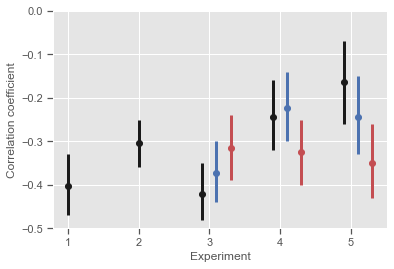

In [54]:
# For each experiment, compute the correlation between std async and inSync rating
expIDs = np.array([1,2,3,4,5])
for idx, val in enumerate(expIDs):
    print(val)
   
    if val < 3: # single tapper
            df = op.loc[op['expID'] == val]
            col1 = 'std_async' 
            col2 = 'syncZ'
            group = 'subID'
    else: # group tapping
            df = fp.loc[fp['expID'] == val]
            col1 = 'sd_avg_async' 
            col2 = 'group_sync_self'
            col3 = 'group_sync_others' 
            col4 = 'sd_std_async'
            col5 = 'group_sync_others'
            group = 'group_num'
            
            grpRmCorr = pg.rm_corr(data=df, x=col1, y=col3, subject=group)
            grpSelfCorr = pg.rm_corr(data=df, x=col4, y=col5, subject=group)
            
    expRmCorr = pg.rm_corr(data=df, x=col1, y=col2, subject=group)
    print(expRmCorr)
    
    
    # plot rm corr coef and conf intervals on same plot (all Exps)
    CIs = expRmCorr['CI95%'][0]
    ax = plt.subplot(111)
    if val < 3:
        jitter = 0
    else: 
        jitter = .1
    plt.vlines(val-jitter, float(CIs[0]), float(CIs[1]))
    plt.plot(val-jitter, expRmCorr['r'],  'ko')
    plt.xticks(np.arange(1, 5.5, step=1)) 
    plt.yticks(np.arange(-.6, .1, step=.1)) 

    
    # Plot additional corrs specific to group experiments
    if val >= 3: 
        
        # plot group sync on same plot in blue
        CIs = grpRmCorr['CI95%'][0]
        ax = plt.subplot(111)
        plt.vlines(val+jitter, float(CIs[0]), float(CIs[1]), 'b')
        plt.plot(val+jitter, grpRmCorr['r'],  'bo')
        
        # also plot self measure in red
        jitter = .3
        CIs = grpSelfCorr['CI95%'][0]
        ax = plt.subplot(111)
        plt.vlines(val+jitter, float(CIs[0]), float(CIs[1]), 'r')
        plt.plot(val+jitter, grpSelfCorr['r'],  'ro')
        print(grpRmCorr)
        print(grpSelfCorr)
        
    print('\n\n')
        
# Overall plot appearance
plt.xlabel("Experiment")
plt.ylabel("Correlation coefficient")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(-.5, 0)

sns.despine()   
sns.set(style="ticks", rc={"lines.linewidth": 3})
plt.savefig('Figures/allExp_tapping_plots.svg', dpi=1200, bbox_inches = 'tight', pad_inches = 0.5)

### Check correlations between all rating scales

In [55]:
# print correlation tables for each experiment
expIDs = np.array([1,2,3,4,5])
for idx, val in enumerate(expIDs):
    print('\nPearson correlation coefficients for all ratings in Exp:', val)
    if val < 3:
        df = op.loc[op['expID'] == val]
        means = df.groupby(['subID', 'alpha'], as_index=False)['grooveZ', 'syncZ', 'likeZ', 'diffZ', 'inflZ'].mean()
        sdf = means[['grooveZ', 'syncZ', 'likeZ', 'diffZ', 'inflZ']].copy()
        print(sdf.rcorr(method='pearson', padjust='fdr_bh'))

    else:
        df = fp.loc[fp['expID'] == val]
        means = df.groupby(['group_num', 'alpha'], as_index=False)['group_groove', 'group_sync_self', 'group_cont', 'group_diff', 'group_infl', 'group_sync_others'].mean()
        sdf = means[['group_groove', 'group_sync_self', 'group_cont', 'group_diff', 'group_infl', 'group_sync_others']].copy()
        print(sdf.rcorr(method='pearson', padjust='fdr_bh'))



Pearson correlation coefficients for all ratings in Exp: 1
        grooveZ   syncZ   likeZ   diffZ inflZ
grooveZ       -     ***     ***     ***    **
syncZ     0.786       -     ***     ***     *
likeZ     0.664   0.566       -     ***     *
diffZ    -0.769  -0.872  -0.524       -      
inflZ     0.354    0.24   0.289  -0.186     -

Pearson correlation coefficients for all ratings in Exp: 2
        grooveZ   syncZ   likeZ  diffZ inflZ
grooveZ       -     ***     ***    ***      
syncZ       0.5       -     ***    ***   ***
likeZ     0.365   0.528       -    ***   ***
diffZ    -0.416  -0.614  -0.483      -   ***
inflZ     0.121   0.299   0.438  -0.29     -

Pearson correlation coefficients for all ratings in Exp: 3
                  group_groove group_sync_self group_cont group_diff  \
group_groove                 -             ***        ***        ***   
group_sync_self          0.952               -        ***        ***   
group_cont               0.808           0.769          - 

### Do Factor Analysis for each experiment individually

EXPERIMENT:  1 


Size of df: (619, 4)
Size of df after dropping missing data: (619, 4) 

Bartlett’s test of sphericity:  750.2292549167629 
p value:  4.3256882969286346e-159 
df: 618

Results are fine. Ok to proceed.


Kaiser-Meyer-Olkin (KMO) Test:  0.7330255194527387

Results are fine. Ok to proceed.


Eigenvalues for factors
 [2.41993797 0.75907453 0.49084075 0.33014675] 

1 eigenvalue(s) are > 1. Therefore, proceed with 1 factor(s).

Factor Loadings:
       Item        F1  communalities
0  grooveZ -0.663033       0.439612
1    syncZ -0.835897       0.698724
2    likeZ -0.460099       0.211691
3    diffZ  0.771964       0.595929

variance:
 Factor variances, proportional variance, cumulative variances
 (array([1.94595623]), array([0.48648906]), array([0.48648906]))



EXPERIMENT:  2 


Size of df: (1112, 4)
Size of df after dropping missing data: (1112, 4) 

Bartlett’s test of sphericity:  1208.4778910251239 
p value:  3.489134002123687e-258 
df: 1111

Results are fine. Ok to proce

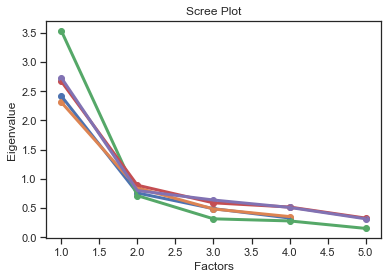

In [56]:
exps = [1,2,3,4,5]
#exps = [1,2]
for e in exps:
    
    # Print out which experiment we're looking at
    print('EXPERIMENT: ', e, '\n\n')
    
    # grab appropriate data and subset into only the ratings that we want
    if e < 3:
        df = op.loc[op['expID'] == e]
        df = df[['grooveZ', 'syncZ', 'likeZ', 'diffZ', 'inflZ']].copy() 
        df = df[['grooveZ', 'syncZ', 'likeZ', 'diffZ']].copy() # remove influence
        
    else: 
        df = fp.loc[fp['expID'] == e]
        df = df[['group_groove', 'group_sync_self', 'group_cont', 'group_diff', 'group_infl', 'group_sync_others']].copy()
        df = df[['group_groove', 'group_sync_self', 'group_cont', 'group_diff', 'group_sync_others']].copy() # remove influence

    # drop any missing data. Print out size so we know
    print('Size of df:', df.shape)
    df = df.dropna() 
    print('Size of df after dropping missing data:', df.shape, '\n')
    # TODO.- deal with this because how will we relate back to tapping data, if we dont know which rows
    # Actually not an issue. (no data to drop)
    
    # check if data are suitable for factor analysis using our custom function
    flag = check_fa(df)
    if flag:
        continue # Do not proceed with FA if one of our tests suggests data are not suitable
    
    # conduct FA using our custom function 
    factorScores = factor_df(df)
    factorScores = factorScores*-1
    if e < 3:
        op.loc[op['expID'] == e, 'Enjoyment'] = factorScores
    else:
        fp.loc[fp['expID'] == e, 'Enjoyment'] = factorScores    
    # TODO - save this somewhere individually for future analyses for each exp. Or plot here.. 
    
    # concatenate factor scores with our original 
    print('\n\n')
    
    

### Run ANOVA on factor score
As we can see from the tables above, all ratings are highly correlated with one another. Therefore, we did a factor analysis and found a one factor solution. We now run an ANOVA on the factor scores. 

In [57]:
# Run ANOVAs and t-tests
expIDs = np.array([1,2,3,4,5])
for idx, val in enumerate(expIDs):
    print('\n\nrm ANOVA, exp:', val)
    if val < 3:
        df = op.loc[op['expID'] == val]
        group = 0
        sub = 'subID'
    else:
        df = fp.loc[fp['expID'] == val]
        group = 1
        sub = 'group_num'
    
    print(rmaov_results(df, group, 'Enjoyment', 0))



rm ANOVA, exp: 1



ANOVA table

  Source         SS  DF        MS          F         p-unc  p-GG-corr  \
0  alpha  10.903593   4  2.725898  13.648907  7.861678e-08    0.00008   
1  Error  11.184067  56  0.199715        NaN           NaN        NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.493651  0.493314      False  0.164365  0.008145  
1       NaN       NaN        NaN       NaN       NaN  


Comparisons between all means

  Contrast     A     B  Paired  Parametric         T   dof       Tail  \
0    alpha  0.00  0.25    True        True  0.312204  14.0  one-sided   
1    alpha  0.00  0.50    True        True  2.794271  14.0  one-sided   
2    alpha  0.00  0.75    True        True  3.483250  14.0  one-sided   
3    alpha  0.00  1.00    True        True  4.550231  14.0  one-sided   
4    alpha  0.25  0.50    True        True  2.959931  14.0  one-sided   
5    alpha  0.25  0.75    True        True  3.009647  14.0  one-sided   
6    alpha  0.25  1.00    True      

           mean       sem  mean-baseline
alpha                                   
0.00   0.384770  0.097688       0.000000
0.25   0.346527  0.106056      -0.038243
0.50   0.056427  0.066900      -0.328344
0.75  -0.157231  0.079275      -0.542001
1.00  -0.656511  0.150167      -1.041282 

           mean       sem  mean-baseline
alpha                                   
0.00  -0.099590  0.076339       0.000000
0.25   0.161942  0.041304       0.261532
0.50   0.044575  0.066018       0.144165
0.75   0.109715  0.041207       0.209304
1.00  -0.173242  0.080106      -0.073652 

           mean       sem  mean-baseline
alpha                                   
0.00   0.579686  0.065830       0.000000
0.35   0.493257  0.065755      -0.086429
0.70  -0.005193  0.049934      -0.584879
1.00  -1.088835  0.107834      -1.668521 

           mean       sem  mean-baseline
alpha                                   
0.00  -0.082063  0.077575       0.000000
0.35   0.081498  0.068616       0.163561
0.70   0.1

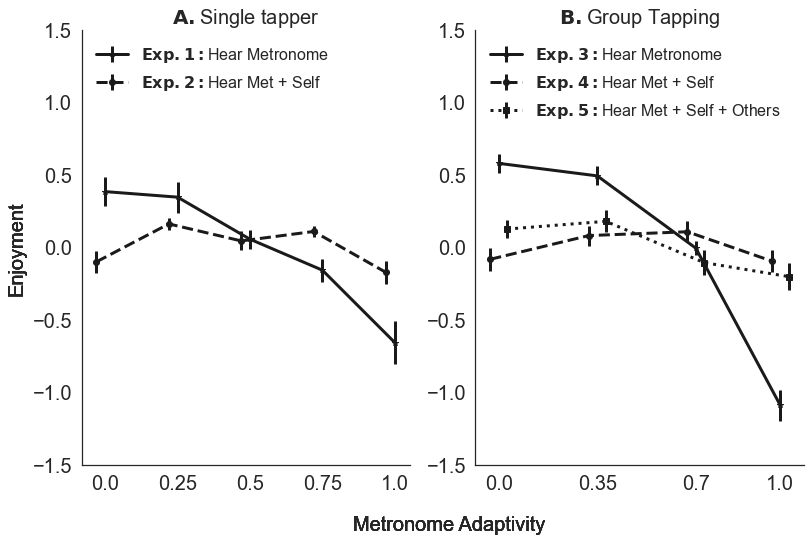

In [58]:
# initalize plot defs
to_zscore = 0 
fig = plt.figure(figsize=(20,8))
expIDs = np.array([1,2,3,4,5])
line_defs = ['k*-', 'ko--', 'k*-', 'ko--', 'ks:']
label_defs = [r"$\bf{" + "Exp. 1: " + "}$" + 'Hear Metronome', r"$\bf{" + "Exp. 2: " + "}$" + 'Hear Met + Self', r"$\bf{" + "Exp. 3: " + "}$" + 'Hear Metronome', r"$\bf{" + "Exp. 4: " + "}$" + 'Hear Met + Self', r"$\bf{" + "Exp. 5: " + "}$" + 'Hear Met + Self + Others']
alpha_offset_defs = [0, -.03, 0, -.03, .03]
fsize = 20
sns.set_style("white")


# loop through each exp
for idx, val in enumerate(expIDs):
    
    # Mask data by experiment
    col = 'Enjoyment'
    if val < 3: # single tapper
        df = op.loc[op['expID'] == val]
        group = 0
    else: # group tapping
        df = fp.loc[fp['expID'] == val]
        group = 1

    # Create plot   
    if val == 1:
        ax = fig.add_subplot(1, 3, 1)
        plt.title('Single tapper', fontsize = fsize)
        plt.title(r"$\bf{" + "A. " + "}$" + 'Single tapper', fontsize = fsize)
    if val == 3:
        ax = fig.add_subplot(1, 3, 2)
        plt.title(r"$\bf{" + "B. " + "}$" + 'Group Tapping', fontsize = fsize)
        
    data = return_mean_sem(df, group, col, to_zscore)
    print(data, '\n')
    ax.errorbar(data.index.values+alpha_offset_defs[idx], data['mean'], yerr = data['sem'], fmt=line_defs[idx], label=label_defs[idx])  
    ax.set_xticks(data.index.values)
    ax.set_xticklabels(data.index.values, fontsize = fsize)
    ax.set_ylim(-1.5, 1.5) 
    ax.tick_params(axis='both', which='major', labelsize=fsize)
    ax.legend(fontsize = 16, frameon=False, loc = 'upper left')
    #ax.grid(True)
    fig.text(0.38, 0.02, 'Metronome Adaptivity', ha='center', va='center', fontsize=fsize)
    fig.text(0.08, 0.5, 'Enjoyment', ha='center', va='center', rotation='vertical', fontsize=fsize)

sns.despine()    
sns.set(style="ticks", rc={"lines.linewidth": 3})
plt.savefig('Figures/allExp_factorScores.eps', dpi=300, bbox_inches = 'tight', pad_inches = 0.5)

### Compare enjoyment between the different experiments. 

In [59]:
print(op.head())

   expID  subID  run  alpha  avg_async  std_async  sem_async  inGroove  \
0      1      1   11   0.25 -50.458333  23.264040   4.652808         5   
1      1      1   12   1.00 -57.875000  40.520862   8.104172         3   
2      1      1   15   0.00 -77.958333  43.615393   8.723079         5   
3      1      1   16   0.50 -36.130435  29.815042   5.963008         5   
4      1      1   18   0.25 -56.333333  24.692309   4.938462         4   

   inSync  likeCont  ...     ANGER   SADNESS  SPIRITUALITY session_id  \
0       5         5  ...  2.666667  2.833333           3.0      32262   
1       4         3  ...  2.666667  2.833333           3.0      32262   
2       4         4  ...  2.666667  2.833333           3.0      32262   
3       5         5  ...  2.666667  2.833333           3.0      32262   
4       5         5  ...  2.666667  2.833333           3.0      32262   

    grooveZ     syncZ     likeZ     diffZ     inflZ  Enjoyment  
0  1.194259  0.796985  0.977964 -0.708355  2.013547

In [60]:
# add 50 to each subID to distinguish IDs between experiments 
expIDs = [1,2]
for idx, val in enumerate(expIDs):
    
    # add constant to different single tapper experiments so have unique label
    
    # Mask data by experiment
    col = 'Enjoyment'
    if val < 3: # single tapper
        df = op.loc[op['expID'] == val]
        group = 0
    else: # group tapping
        df = fp.loc[fp['expID'] == val]
        group = 1



In [61]:
# compare enjoyment between the different experiments. 

# single player experiments
print('\n\n\nSingle tapper experiments\n')
means = op.groupby(['session_id', 'alpha', 'expID'], as_index=False)['Enjoyment'].mean()
print('ANOVA result:\n')
print(means.mixed_anova(dv="Enjoyment", between="expID", within="alpha", subject="session_id")) # use session ID because this is unique for each exp, whereas subID starts over at 1
print('\n\n')
print('Contrasts:\n')
print(pg.pairwise_ttests(dv='Enjoyment', between='expID', within='alpha', subject="session_id", data=means, alpha = .05, tail = 'one-sided', padjust = 'holm', effsize = 'cohen'))

ex1 = return_mean_sem(op.loc[op['expID'] == 1], 0, 'Enjoyment', 0)
ex2 = return_mean_sem(op.loc[op['expID'] == 2], 0, 'Enjoyment', 0)

print('\n\nDifference between overall means Exp. 1 vs. 2:\n')
print(ex2['mean'].mean() - ex1['mean'].mean())


# group experiments
print('\n\n\nGroup experiments\n')
means = fp.groupby(['group', 'alpha', 'expID'], as_index=False)['Enjoyment'].mean()
print('ANOVA result:\n')
print(means.mixed_anova(dv="Enjoyment", between="expID", within="alpha", subject="group"))
print('\n\n')
print('Contrasts:\n')
print(pg.pairwise_ttests(dv='Enjoyment', between='expID', within='alpha', subject="group", data=means, alpha = .05, tail = 'one-sided', padjust = 'holm', effsize = 'cohen'))

ex3 = return_mean_sem(fp.loc[fp['expID'] == 3], 1, 'Enjoyment', 0)
ex4 = return_mean_sem(fp.loc[fp['expID'] == 4], 1, 'Enjoyment', 0)
ex5 = return_mean_sem(fp.loc[fp['expID'] == 5], 1, 'Enjoyment', 0)

print('\n\nDifference between overall means Exp. 3 vs. 4:\n')
print(ex4['mean'].mean() - ex3['mean'].mean())

print('\n\nDifference between overall means Exp. 4 vs. 5:\n')
print(ex5['mean'].mean() - ex4['mean'].mean())

print('\n\nDifference between overall means Exp. 3 vs. 5:\n')
print(ex5['mean'].mean() - ex3['mean'].mean())




Single tapper experiments

ANOVA result:

        Source        SS  DF1  DF2        MS          F         p-unc  \
0        expID  0.009168    1   39  0.009168   1.086196  3.037333e-01   
1        alpha  7.531214    4  156  1.882803  12.219633  1.146686e-08   
2  Interaction  5.447273    4  156  1.361818   8.838373  1.854845e-06   

   p-GG-corr       np2       eps sphericity  W-spher       p-spher  
0        NaN  0.027097       NaN        NaN      NaN           NaN  
1   0.000074  0.238573  0.532685      False  0.18827  2.226631e-10  
2        NaN  0.184755       NaN        NaN      NaN           NaN  



Contrasts:

         Contrast alpha     A     B Paired  Parametric         T        dof  \
0           alpha     -   0.0  0.25   True        True -2.162459  40.000000   
1           alpha     -   0.0   0.5   True        True  0.300294  40.000000   
2           alpha     -   0.0  0.75   True        True  0.637769  40.000000   
3           alpha     -   0.0   1.0   True        True 

In [62]:
means = fp.groupby(['group', 'alpha', 'expID'], as_index=False)['Enjoyment'].mean()
#print(means.head())
print(means.mixed_anova(dv="Enjoyment", within="alpha", subject="group", between="expID"))

        Source         SS  DF1  DF2        MS          F         p-unc  \
0        expID   0.003765    2   68  0.001883   0.721710  4.896048e-01   
1        alpha  26.415708    3  204  8.805236  47.550442  2.408392e-23   
2  Interaction  23.981982    6  204  3.996997  21.584768  1.399142e-19   

      p-GG-corr       np2       eps sphericity   W-spher       p-spher  
0           NaN  0.020786       NaN        NaN       NaN           NaN  
1  4.145196e-11  0.411512  0.634719      False  0.434589  4.493029e-11  
2           NaN  0.388322       NaN        NaN       NaN           NaN  


### Is musicianship a factor in how much people benefit from adaptivity? 
To test this explicitly, let's median split our participants by musicianship and run some t-tests.



Low musicianship group:

 count    19.000000
mean     57.192175
std       8.234720
min      44.000000
25%      50.500000
50%      55.000000
75%      63.000000
max      76.000000
Name: gen_soph, dtype: float64
(19, 36)


High musicianship group:

 count     18.000000
mean      88.764190
std       10.939246
min       79.000000
25%       80.750000
50%       84.289474
75%       92.632353
max      114.000000
Name: gen_soph, dtype: float64
(18, 36)


T-test comparing adaptivity benefit in low vs. high musicians:

               T        dof       tail     p-val          CI95%   cohen-d  \
T-test  0.397036  24.143829  two-sided  0.694829  [-4.38, 6.46]  0.132884   

         BF10     power  
T-test  0.339  0.067877  


T-test comparing adaptivity benefit in low musicians to zero:

               T  dof     tail     p-val       CI95%   cohen-d      BF10  \
T-test  5.333516   18  greater  0.000023  [4.0, inf]  1.223592  1133.747   

           power  
T-test  0.999746  
mean benefit =  5.9276

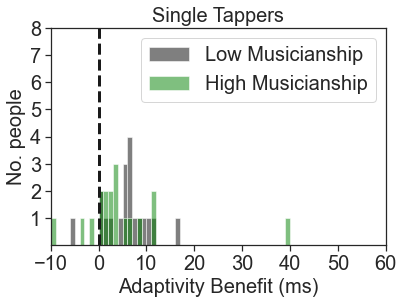

In [63]:
# print('Overall distribution of general sophistication scores:\n')
# print(op['gen_soph'].describe())
# print('\nMedian:', op['gen_soph'].median())

# do median split 
lowMus = op[op['gen_soph'] <= op['gen_soph'].median()]
highMus = op[op['gen_soph'] > op['gen_soph'].median()]

# get adaptivity benefit
meansLow = lowMus.groupby(['subID', 'alpha'], as_index=False).mean() 
a25Low = meansLow[meansLow['alpha'] == .25] 
a0Low = meansLow[meansLow['alpha'] == 0] 
optBenLow = a0Low['std_async'].to_numpy() - a25Low['std_async'].to_numpy()

meansHigh = highMus.groupby(['subID', 'alpha'], as_index=False).mean() 
a25High = meansHigh[meansHigh['alpha'] == .25] 
a0High = meansHigh[meansHigh['alpha'] == 0] 
optBenHigh = a0High['std_async'].to_numpy() - a25High['std_async'].to_numpy()

# print results
print('\n\nLow musicianship group:\n\n', a0Low['gen_soph'].describe())
print(a0Low.shape)
print('\n\nHigh musicianship group:\n\n', a0High['gen_soph'].describe())
print(a0High.shape)

print('\n\nT-test comparing adaptivity benefit in low vs. high musicians:\n')
print(pg.ttest(optBenLow, optBenHigh, tail = 'two-sided', correction='auto'))

# plot
bins_list = np.arange(-10, 60, 1)
plt.hist(optBenLow, bins_list, alpha=0.5, label='Low Musicianship', color="black")
plt.hist(optBenHigh, bins_list, alpha=0.5, label='High Musicianship', color="green")
plt.legend(loc='upper right', fontsize=fsize)
plt.title('Single Tappers', fontsize=fsize)
plt.xlabel('Adaptivity Benefit (ms)', fontsize=fsize)
plt.ylabel('No. people', fontsize=fsize)
plt.xlim(-10, 60)
plt.ylim(0, 8)
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8], fontsize=fsize)
plt.xticks(fontsize=fsize)
ylims = plt.gca().get_ylim()
plt.vlines(0, ylims[0], ylims[1], colors='k', linestyles='dashed')
plt.savefig('Figures/musicianship_single.svg', dpi=1200, bbox_inches = 'tight', pad_inches = 0.5)

# print results
print('\n\nT-test comparing adaptivity benefit in low musicians to zero:\n')
print(pg.ttest(optBenLow, 0, tail = 'one-sided', correction='auto'))
print('mean benefit = ', optBenLow.mean())

print('\n\nT-test comparing adaptivity benefit in high musicians to zero:\n')
print(pg.ttest(optBenHigh, 0, tail = 'one-sided', correction='auto'))
print('mean benefit = ', optBenHigh.mean())

plt.savefig('Figures/single_adaptBen.svg', dpi=1200, bbox_inches = 'tight',
    pad_inches = 0.5)

#### Now do the same for group tappers
NOTE: this will be on average group ability. 



Low musicianship group:

 count    39.000000
mean     65.621795
std       4.805381
min      54.000000
25%      62.500000
50%      68.000000
75%      69.375000
max      70.500000
Name: gen_soph, dtype: float64


High musicianship group:

 count    32.000000
mean     76.593750
std       5.485593
min      70.750000
25%      72.000000
50%      74.875000
75%      79.812500
max      94.250000
Name: gen_soph, dtype: float64


T-test comparing adaptivity benefit in low vs. high musicians:

               T        dof       tail     p-val          CI95%   cohen-d  \
T-test -1.501017  44.821713  two-sided  0.140364  [-7.93, 1.16]  0.378903   

         BF10     power  
T-test  0.641  0.347189  


T-test comparing adaptivity benefit in low musicians to zero:

               T  dof     tail         p-val        CI95%   cohen-d  \
T-test  6.676709   38  greater  3.377723e-08  [4.85, inf]  1.069129   

             BF10  power  
T-test  4.258e+05    1.0  
mean benefit =  6.487495072414531


T-test

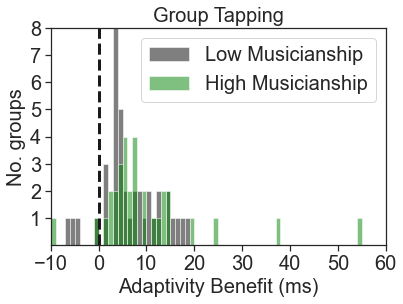

In [64]:
# print('Overall distribution of general sophistication scores:\n')
# print(fp['gen_soph'].describe())
# print('\nMedian:', fp['gen_soph'].median())

lowMus = fp[fp['gen_soph'] <= fp['gen_soph'].median()]
highMus = fp[fp['gen_soph'] > fp['gen_soph'].median()]

meansLow = lowMus.groupby(['group', 'alpha'], as_index=False).mean() 
a25Low = meansLow[meansLow['alpha'] == .35] 
a0Low = meansLow[meansLow['alpha'] == 0] 
optBenLow = a0Low['sd_avg_async'].to_numpy() - a25Low['sd_avg_async'].to_numpy()

meansHigh = highMus.groupby(['group', 'alpha'], as_index=False).mean() 
a25High = meansHigh[meansHigh['alpha'] == .35] 
a0High = meansHigh[meansHigh['alpha'] == 0] 
optBenHigh = a0High['sd_avg_async'].to_numpy() - a25High['sd_avg_async'].to_numpy()

print('\n\nLow musicianship group:\n\n', a0Low['gen_soph'].describe())
print('\n\nHigh musicianship group:\n\n', a0High['gen_soph'].describe())

print('\n\nT-test comparing adaptivity benefit in low vs. high musicians:\n')
print(pg.ttest(optBenLow, optBenHigh, tail = 'two-sided', correction='auto'))

bins_list = np.arange(-10, 60, 1)

plt.hist(optBenLow, bins_list, alpha=0.5, label='Low Musicianship', color="black")
plt.hist(optBenHigh, bins_list, alpha=0.5, label='High Musicianship', color="green")
plt.legend(loc='upper right', fontsize=fsize)
plt.title('Group Tapping', fontsize=fsize)
plt.xlabel('Adaptivity Benefit (ms)', fontsize=fsize)
plt.ylabel('No. groups', fontsize=fsize)
plt.xlim(-10, 60)
plt.ylim(0, 8)
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8], fontsize=fsize)
plt.xticks(fontsize=fsize)
ylims = plt.gca().get_ylim()
plt.vlines(0, ylims[0], ylims[1], colors='k', linestyles='dashed')
plt.savefig('Figures/musicianship_group.svg', dpi=1200, bbox_inches = 'tight', pad_inches = 0.5)
    

print('\n\nT-test comparing adaptivity benefit in low musicians to zero:\n')
print(pg.ttest(optBenLow, 0, tail = 'one-sided', correction='auto'))
print('mean benefit = ', optBenLow.mean())

print('\n\nT-test comparing adaptivity benefit in high musicians to zero:\n')
print(pg.ttest(optBenHigh, 0, tail = 'one-sided', correction='auto'))
print('mean benefit = ', optBenHigh.mean())


plt.savefig('Figures/group_adaptBen.svg', dpi=1200, bbox_inches = 'tight',
    pad_inches = 0.5)